In [1]:
#import nessary library
import numpy as np
"""
This cell imports necessary libraries for data manipulation, visualization, and date-time operations.
It also sets some default parameters for matplotlib visualizations.
"""

#import necessary library
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from datetime import datetime
import os
import numpy as np

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
#load data
"""
Load the dataset from a CSV file.
The dataset contains air quality data from Tiantan, Beijing, from March 2013 to February 2017.
"""
data = pd.read_csv(r'archive/PRSA_Data_Tiantan_20130301-20170228.csv')

In [3]:
"""
Print the first five rows of the dataset to get an initial understanding of the data.
"""
print(data.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
1   2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7   
2   3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2   
3   4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
1  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
3  1026.2 -25.5   0.0    N   4.9  Tiantan  
4  1027.1 -24.5   0.0  NNW   3.2  Tiantan  


In [4]:
"""
Print the column names of the dataset to understand its structure.
"""
data.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [5]:
"""
Print the shape of the dataset to understand its dimensions (number of rows and columns).
"""
data.shape

(35064, 18)

In [6]:
"""
Print a concise summary of the dataset, including the number of non-null values and data types of each column.
"""
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [7]:
def convert_to_date(x):
	return datetime.strptime(x, '%Y %m %d %H')

In [8]:
df = data.copy()

In [9]:
df['year_month_day_hour'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

In [10]:
df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
1   2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7   
2   3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2   
3   4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM  station year_month_day_hour  
0  1024.5 -21.4   0.0  NNW   5.7  Tiantan 2013-03-01 00:00:00  
1  1025.1 -22.1   0.0   NW   3.9  Tiantan 2013-03-01 01:00:00  
2  1025.3 -24.6   0.0  NNW   5.3  Tiantan 2013-03-01 02:00:00  
3  1026.2 -25.5   0.0    N   4.9  Tiantan 2013-03-01 03:00:00  
4  1027.1 -24.5   0.0  NNW   3.2  Tiantan 2013-03-01 04:00:00

Examining the composition of the dataset

In [11]:

print(df.shape)

(35064, 19)


In [12]:
print(pd.value_counts(df.dtypes))

float64           11
int64              5
object             2
datetime64[ns]     1
Name: count, dtype: int64


C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_22416\3505523575.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(df.dtypes))


In [13]:
#features in dataset
print("\nFeature : \n", df.columns.to_list())


Feature : 
 ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station', 'year_month_day_hour']


In [14]:
#checking null values
print("\nNull values : \n", df.isnull())


Null values : 
           No   year  month    day   hour  PM2.5   PM10    SO2    NO2     CO  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
35059  False  False  False  False  False  False  False  False   True  False   
35060  False  False  False  False  False  False  False  False  False  False   
35061  False  False  False  False  False  False  False  False  False  False   
35062  False  False  False  False  False  False  False  False  False  False   
35063  False  False  False  False  False  False  False  False  False  False   

          O3   TEMP   PRES   DEWP 

In [15]:
#checking null values count
"""
Check and print the count of null values for each column in the dataframe.
"""
print("\nNull values count : \n", df.isnull().sum())


Null values count : 
 No                        0
year                      0
month                     0
day                       0
hour                      0
PM2.5                   677
PM10                    597
SO2                    1118
NO2                     744
CO                     1126
O3                      843
TEMP                     20
PRES                     20
DEWP                     20
RAIN                     20
wd                       78
WSPM                     14
station                   0
year_month_day_hour       0
dtype: int64


In [16]:
#Check for duplicate values
"""
Check and print whether there are any duplicate rows in the dataframe.
"""
print("\nDuplicate values : \n", df.duplicated())


Duplicate values : 
 0        False
1        False
2        False
3        False
4        False
         ...  
35059    False
35060    False
35061    False
35062    False
35063    False
Length: 35064, dtype: bool


In [17]:
#check univalues
"""
Check and print the number of unique values for each column in the dataframe.
This will help in understanding the diversity of data in each column.
"""
print("\nUnique values : \n", df.nunique())


Unique values : 
 No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5                    545
PM10                     640
SO2                      259
NO2                      319
CO                       117
O3                       678
TEMP                     963
PRES                     595
DEWP                     617
RAIN                     119
wd                        16
WSPM                     101
station                    1
year_month_day_hour    35064
dtype: int64


In [18]:
#set timestamp as index
"""
Set the 'year_month_day_hour' column as the index of the dataframe.
This will allow for easier time series manipulation and visualization.
"""
df = df.set_index('year_month_day_hour')

In [19]:
#check index
"""                         
Check and print the index of the dataframe.
This will help in understanding the structure of the dataframe's index.
"""
df.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='year_month_day_hour', length=35064, freq=None)

In [20]:
#print top 5 rows
"""
Print the first five rows of the dataframe to get an initial understanding of the data.
"""
print(df.head())

                     No  year  month  day  hour  PM2.5  PM10  SO2   NO2  \
year_month_day_hour                                                       
2013-03-01 00:00:00   1  2013      3    1     0    6.0   6.0  4.0   8.0   
2013-03-01 01:00:00   2  2013      3    1     1    6.0  29.0  5.0   9.0   
2013-03-01 02:00:00   3  2013      3    1     2    6.0   6.0  4.0  12.0   
2013-03-01 03:00:00   4  2013      3    1     3    6.0   6.0  4.0  12.0   
2013-03-01 04:00:00   5  2013      3    1     4    5.0   5.0  7.0  15.0   

                        CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
year_month_day_hour                                                             
2013-03-01 00:00:00  300.0  81.0  -0.5  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
2013-03-01 01:00:00  300.0  80.0  -0.7  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2013-03-01 02:00:00  300.0  75.0  -1.2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
2013-03-01 03:00:00  300.0  74.0  -1.4  1026.2 -25.5   0.0    N   4.9

In [21]:
#filter df based on index
"""
Filter the dataframe to include only the rows from March 1, 2013, between 00:00:00 and 23:00:00.
This will help in analyzing the data for a specific day.
"""
df.loc['2013-03-01 00:00:00':'2013-03-01 23:00:00']

No  year  month  day  hour  PM2.5  PM10   SO2   NO2  \
year_month_day_hour                                                        
2013-03-01 00:00:00   1  2013      3    1     0    6.0   6.0   4.0   8.0   
2013-03-01 01:00:00   2  2013      3    1     1    6.0  29.0   5.0   9.0   
2013-03-01 02:00:00   3  2013      3    1     2    6.0   6.0   4.0  12.0   
2013-03-01 03:00:00   4  2013      3    1     3    6.0   6.0   4.0  12.0   
2013-03-01 04:00:00   5  2013      3    1     4    5.0   5.0   7.0  15.0   
2013-03-01 05:00:00   6  2013      3    1     5   10.0  10.0  12.0  15.0   
2013-03-01 06:00:00   7  2013      3    1     6    8.0  19.0  12.0  14.0   
2013-03-01 07:00:00   8  2013      3    1     7    7.0   7.0  12.0  19.0   
2013-03-01 08:00:00   9  2013      3    1     8    3.0   6.0  14.0  29.0   
2013-03-01 09:00:00  10  2013      3    1     9    8.0   2.0  11.0  22.0   
2013-03-01 10:00:00  11  2013      3    1    10    9.0   9.0   8.0  17.0   
2013-03-01 11:00:00  12  2013      3    1    11    9.0  23.0   8.0  16.0   
2013-03-01 12:00:00  13  2013      3    1    12    9.0  19.0   7.0  16.0   
2013-03-01 13:00:00  14  2013      3    1    13   10.0  34.0   7.0  12.0   
2013-03-01 14:00:00  15  2013      3    1    14   10.0  19.0   6.0  12.0   
2013-03-01 15:00:00  16  2013      3    1    15    3.0   6.0   6.0  15.0   
2013-03-01 16:00:00  17  2013      3    1    16    8.0  22.0   7.0  14.0   
2013-03-01 17:00:00  18  2013      3    1    17   10.0  28.0   9.0  21.0   
2013-03-01 18:00:00  19  2013      3    1    18   11.0  21.0  10.0  28.0   
2013-03-01 19:00:00  20  2013      3    1    19   12.0   4.0   7.0  39.0   
2013-03-01 20:00:00  21  2013      3    1    20   12.0  16.0   8.0  30.0   
2013-03-01 21:00:00  22  2013      3    1    21   12.0  17.0  13.0  43.0   
2013-03-01 22:00:00  23  2013      3    1    22   12.0  16.0  15.0  48.0   
2013-03-01 23:00:00  24  2013      3    1    23   15.0  17.0  17.0  52.0   

                        CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
year_month_day_hour                                                             
2013-03-01 00:00:00  300.0  81.0  -0.5  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
2013-03-01 01:00:00  300.0  80.0  -0.7  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2013-03-01 02:00:00  300.0  75.0  -1.2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
2013-03-01 03:00:00  300.0  74.0  -1.4  1026.2 -25.5   0.0    N   4.9  Tiantan  
2013-03-01 04:00:00  400.0  70.0  -1.9  1027.1 -24.5   0.0  NNW   3.2  Tiantan  
2013-03-01 05:00:00  400.0  70.0  -2.4  1027.5 -21.3   0.0   NW   2.4  Tiantan  
2013-03-01 06:00:00  400.0  72.0  -2.5  1028.2 -20.4   0.0   NW   2.2  Tiantan  
2013-03-01 07:00:00  400.0  67.0  -1.4  1029.5 -20.4   0.0  NNW   3.0  Tiantan  
2013-03-01 08:00:00  500.0  56.0  -0.3  1030.4 -21.2   0.0   NW   4.6  Tiantan  
2013-03-01 09:00:00  500.0  65.0   0.4  1030.5 -23.3   0.0    N   5.5  Tiantan  
2013-03-01 10:00:00  400.0  72.0   1.4  1030.2 -22.5   0.0    N   5.2  Tiantan  
2013-03-01 11:00:00  400.0  75.0   2.9  1029.8 -22.9   0.0  NNW   5.3  Tiantan  
2013-03-01 12:00:00  400.0  76.0   4.0  1028.6 -21.2   0.0    W   4.6  Tiantan  
2013-03-01 13:00:00  400.0  81.0   5.0  1027.8 -21.2   0.0   NW   4.5  Tiantan  
2013-03-01 14:00:00  400.0  83.0   6.2  1027.6 -22.2   0.0   NW   4.0  Tiantan  
2013-03-01 15:00:00  400.0  81.0   6.0  1027.7 -21.3   0.0  NNW   2.1  Tiantan  
2013-03-01 16:00:00  300.0  82.0   5.6  1027.7 -20.7   0.0    N   1.8  Tiantan  
2013-03-01 17:00:00  400.0  75.0   4.4  1028.2 -20.9   0.0    N   3.5  Tiantan  
2013-03-01 18:00:00  500.0  66.0   3.2  1029.4 -20.3   0.0  NNW   0.5  Tiantan  
2013-03-01 19:00:00  600.0  53.0   3.0  1030.1 -19.7   0.0    N   1.1  Tiantan  
2013-03-01 20:00:00  500.0  60.0   1.6  1031.3 -19.0   0.0  ENE   1.2  Tiantan  
2013-03-01 21:00:00  700.0  44.0   0.8  1032.4 -19.7   0.0   NE   1.0  Tiantan  
2013-03-01 22:00:00  800.0  39.0   0.1  1032.9 -19.2   0.0  ENE   1.8  Tiantan  
2013-03-01 23:00:00

In [22]:
"""
Filter the dataframe to include only the rows from the years 2013 to 2015.
This will help in analyzing the data for these specific years.
"""
df.loc['2013':'2015']

No  year  month  day  hour  PM2.5   PM10   SO2    NO2  \
year_month_day_hour                                                             
2013-03-01 00:00:00      1  2013      3    1     0    6.0    6.0   4.0    8.0   
2013-03-01 01:00:00      2  2013      3    1     1    6.0   29.0   5.0    9.0   
2013-03-01 02:00:00      3  2013      3    1     2    6.0    6.0   4.0   12.0   
2013-03-01 03:00:00      4  2013      3    1     3    6.0    6.0   4.0   12.0   
2013-03-01 04:00:00      5  2013      3    1     4    5.0    5.0   7.0   15.0   
...                    ...   ...    ...  ...   ...    ...    ...   ...    ...   
2015-12-31 19:00:00  24860  2015     12   31    19   82.0  165.0   5.0   90.0   
2015-12-31 20:00:00  24861  2015     12   31    20  115.0  154.0   4.0   89.0   
2015-12-31 21:00:00  24862  2015     12   31    21  141.0  169.0   5.0   92.0   
2015-12-31 22:00:00  24863  2015     12   31    22  181.0  222.0  10.0  121.0   
2015-12-31 23:00:00  24864  2015     12   31    23  203.0  230.0  14.0  114.0   

                         CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 00:00:00   300.0  81.0  -0.5  1024.5 -21.4   0.0  NNW   5.7   
2013-03-01 01:00:00   300.0  80.0  -0.7  1025.1 -22.1   0.0   NW   3.9   
2013-03-01 02:00:00   300.0  75.0  -1.2  1025.3 -24.6   0.0  NNW   5.3   
2013-03-01 03:00:00   300.0  74.0  -1.4  1026.2 -25.5   0.0    N   4.9   
2013-03-01 04:00:00   400.0  70.0  -1.9  1027.1 -24.5   0.0  NNW   3.2   
...                     ...   ...   ...     ...   ...   ...  ...   ...   
2015-12-31 19:00:00  2200.0   2.0  -1.4  1026.3  -8.6   0.0    E   1.0   
2015-12-31 20:00:00  2600.0   2.0  -2.5  1026.2  -8.4   0.0    E   1.3   
2015-12-31 21:00:00  3500.0   2.0  -2.7  1025.8  -8.0   0.0  ENE   0.9   
2015-12-31 22:00:00  5100.0   4.0  -3.5  1025.5  -7.6   0.0  ENE   0.4   
2015-12-31 23:00:00  4300.0   3.0  -3.4  1025.2  -7.5   0.0   NE   1.8   

                     station  
year_month_day_hour           
2013-03-01 00:00:00  Tiantan  
2013-03-01 01:00:00  Tiantan  
2013-03-01 02:00:00  Tiantan  
2013-03-01 03:00:00  Tiantan  
2013-03-01 04:00:00  Tiantan  
...                      ...  
2015-12-31 19:00:00  Tiantan  
2015-12-31 20:00:00  Tiantan  
2015-12-31 21:00:00  Tiantan  
2015-12-31 22:00:00  Tiantan  
2015-12-31 23:00:00  Tiantan  

[24864 rows x 18 columns]

In [23]:
# fileter PM2.5 values
"""
Filter the dataframe to include only the 'PM2.5' column.
This will help in analyzing the PM2.5 values specifically.
"""
pm_data = df['PM2.5']
pm_data.head()

year_month_day_hour
2013-03-01 00:00:00    6.0
2013-03-01 01:00:00    6.0
2013-03-01 02:00:00    6.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

<Axes: xlabel='year_month_day_hour'>

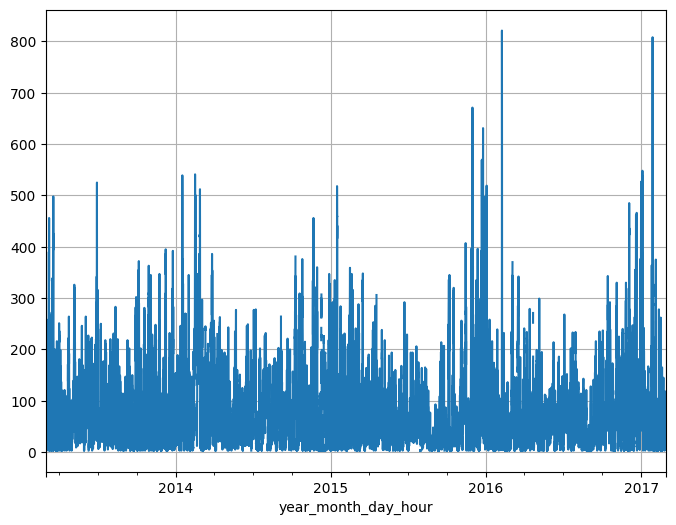

In [24]:
"""
Plot the PM2.5 data with a grid for better visualization.
This will help in understanding the trends and patterns in the PM2.5 values over time.
"""
pm_data.plot(grid=True)

In [25]:
import pandas as pd
import plotly.express as px
"""
This cell creates an interactive time series chart for PM2.5 data with a zoom slider.
It uses Plotly Express to generate the line plot and adds a range slider for better visualization.
"""
# Create an interactive time series chart with a zoom slider
fig = px.line(pm_data, x=pm_data.index, y='PM2.5', title='PM2.5 Time Series with Zoom Slider')
fig.update_xaxes(rangeslider_visible=True)
# Show the chart
fig.show()

In [26]:
# visualize 2015 data
"""
Filter the PM2.5 data to include only the rows from the year 2015.
This will help in analyzing the PM2.5 values specifically for the year 2015.
"""
pm_data_2015 = pm_data.loc['2015']

<Axes: xlabel='year_month_day_hour'>

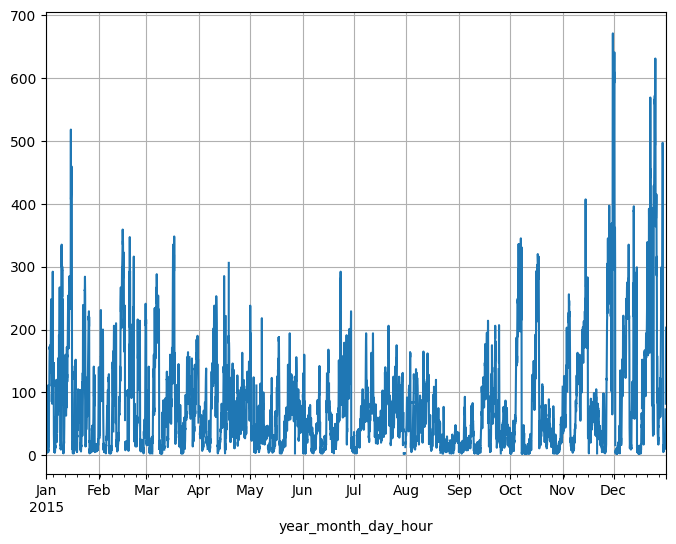

In [27]:
"""
Plot the PM2.5 data for the year 2015 with a grid for better visualization.
This will help in understanding the trends and patterns in the PM2.5 values for the year 2015.
"""
pm_data_2015.plot(grid=True)

<Axes: xlabel='year_month_day_hour'>

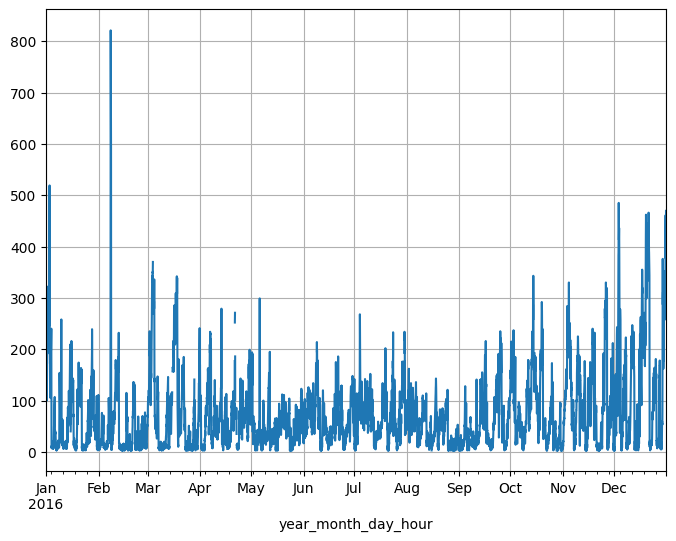

In [28]:
"""
Filter the PM2.5 data to include only the rows from the year 2016.
This will help in analyzing the PM2.5 values specifically for the year 2016.
"""
pm_data_2016 = pm_data.loc['2016']
pm_data_2016.plot(grid=True)

In [29]:
"""
Print the first five rows of the dataframe to get an initial understanding of the data.
"""
df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2  \
year_month_day_hour                                                       
2013-03-01 00:00:00   1  2013      3    1     0    6.0   6.0  4.0   8.0   
2013-03-01 01:00:00   2  2013      3    1     1    6.0  29.0  5.0   9.0   
2013-03-01 02:00:00   3  2013      3    1     2    6.0   6.0  4.0  12.0   
2013-03-01 03:00:00   4  2013      3    1     3    6.0   6.0  4.0  12.0   
2013-03-01 04:00:00   5  2013      3    1     4    5.0   5.0  7.0  15.0   

                        CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
year_month_day_hour                                                             
2013-03-01 00:00:00  300.0  81.0  -0.5  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
2013-03-01 01:00:00  300.0  80.0  -0.7  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2013-03-01 02:00:00  300.0  75.0  -1.2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
2013-03-01 03:00:00  300.0  74.0  -1.4  1026.2 -25.5   0.0    N   4.9  Tiantan  
2013-03-01 04:00:00  400.0  70.0  -1.9  1027.1 -24.5   0.0  NNW   3.2  Tiantan

In [30]:
import plotly.express as px
"""
Create an interactive time series chart for PM2.5 data with a zoom slider.
This will help in visualizing the trends and patterns in the PM2.5 values over time.
"""
fig = px.line(df, x=df.index, y='PM2.5', title='PM2.5 with Slider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [31]:
#update above visualization with rangeselector
"""
Create an interactive time series chart for PM2.5 data with a range selector.
This will help in visualizing the trends and patterns in the PM2.5 values over time.
"""
fig = px.line(df, x=df.index, y='PM2.5', title='PM2.5 with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

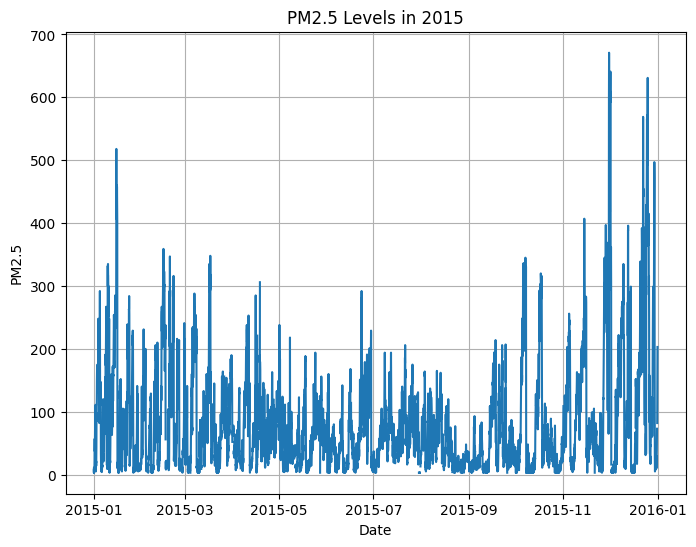

In [32]:
"""
Plot the PM2.5 data for the year 2015.
This will help in visualizing the trends and patterns in the PM2.5 values for the year 2015.
"""
plt.plot(pm_data_2015)
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('PM2.5 Levels in 2015')
plt.grid(True)
plt.show()

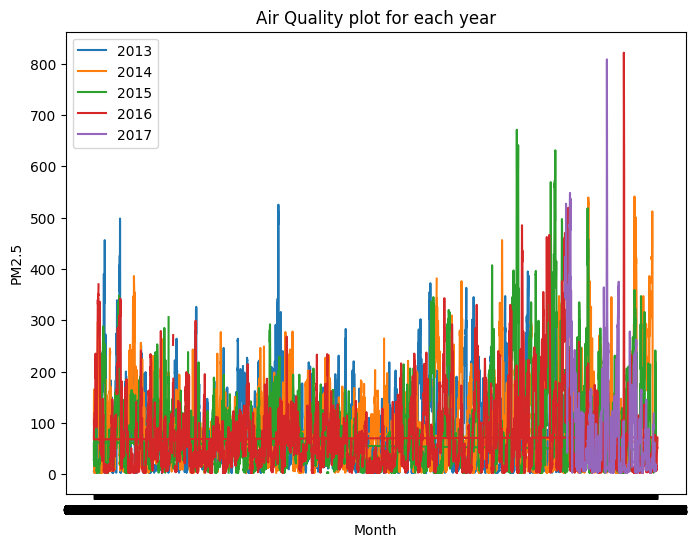

In [33]:
"""
Filter the dataframe to include only the rows from the years 2013 to 2017.
Create a new column 'month_day_hour' to represent the month, day, and hour in a specific format.
Plot the PM2.5 data for each year from 2013 to 2017.
This will help in visualizing the trends and patterns in the PM2.5 values for each year.
"""
df_2013 = df.loc['2013'].reset_index()
df_2014 = df.loc['2014'].reset_index()
df_2015 = df.loc['2015'].reset_index()
df_2016 = df.loc['2016'].reset_index()
df_2017 = df.loc['2017'].reset_index()

df_2013['month_day_hour'] = df_2013['year_month_day_hour'].dt.strftime('%m-%d %H')
df_2014['month_day_hour'] = df_2014['year_month_day_hour'].dt.strftime('%m-%d %H')
df_2015['month_day_hour'] = df_2015['year_month_day_hour'].dt.strftime('%m-%d %H')
df_2016['month_day_hour'] = df_2016['year_month_day_hour'].dt.strftime('%m-%d %H')
df_2017['month_day_hour'] = df_2017['year_month_day_hour'].dt.strftime('%m-%d %H')

plt.plot(df_2013['month_day_hour'], df_2013['PM2.5'])
plt.plot(df_2014['month_day_hour'], df_2014['PM2.5'])
plt.plot(df_2015['month_day_hour'], df_2015['PM2.5'])
plt.plot(df_2016['month_day_hour'], df_2016['PM2.5'])
plt.plot(df_2017['month_day_hour'], df_2017['PM2.5'])

plt.legend(['2013', '2014', '2015', '2016', '2017'])
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('Air Quality plot for each year')
plt.show()

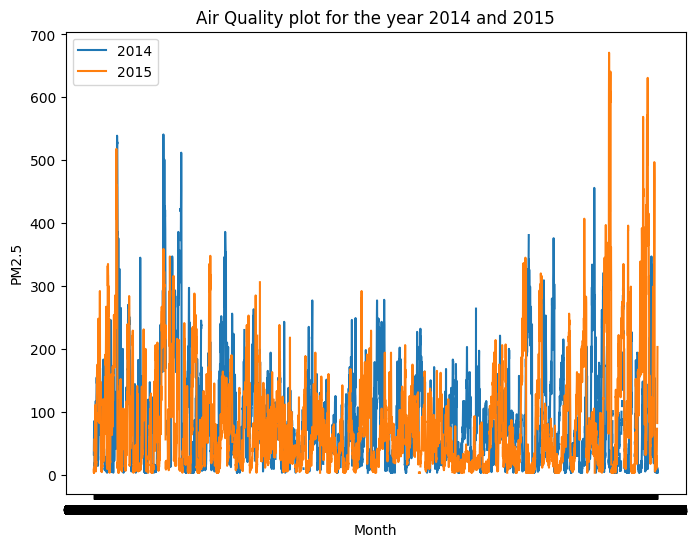

In [34]:
"""
Compare the PM2.5 levels between the years 2014 and 2015.
This will help in visualizing the trends and patterns in the PM2.5 values for these specific years.
"""
# Compare 2014 and 2015 alone
df_2014 = df.loc['2014'].reset_index()
df_2015 = df.loc['2015'].reset_index()

# Create a new column 'month_day_hour' to represent the month, day, and hour in a specific format
df_2014['month_day_hour'] = df_2014['year_month_day_hour'].dt.strftime('%m-%d %H')
df_2015['month_day_hour'] = df_2015['year_month_day_hour'].dt.strftime('%m-%d %H')

# Plot the PM2.5 data for the years 2014 and 2015
plt.plot(df_2014['month_day_hour'], df_2014['PM2.5'])
plt.plot(df_2015['month_day_hour'], df_2015['PM2.5'])

# Add legend, labels, and title to the plot
plt.legend(['2014', '2015'])
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('Air Quality plot for the year 2014 and 2015')
plt.show()

In [ ]:
#group by month
"""
Group the data by month and calculate the mean PM2.5 values for each month.
This will help in understanding the average PM2.5 levels for each month.
"""
df['2014':'2016'][['month', 'PM2.5']].groupby('month').describe()

PM2.5                                                       
        count        mean         std  min   25%   50%    75%    max
month                                                               
1      2203.0   90.681707   90.272113  3.0  16.0  68.0  132.0  539.0
2      1993.0   92.299548  105.336714  3.0  13.0  53.0  140.0  821.0
3      2203.0   90.688425   83.378747  3.0  20.0  69.0  136.0  386.0
4      2104.0   74.408270   52.577051  3.0  35.0  65.0  101.0  306.0
5      2139.0   55.591164   43.602628  3.0  24.0  44.0   76.0  299.0
6      2123.0   61.910504   47.099835  3.0  27.0  50.0   85.0  292.0
7      2203.0   76.149796   54.505841  3.0  35.0  63.0  105.0  278.0
8      2166.0   54.068375   39.590722  3.0  21.0  44.0   80.0  203.0
9      2109.0   57.795638   48.601968  3.0  19.0  42.0   85.0  264.0
10     2189.0   88.952947   84.912301  3.0  22.0  57.0  134.0  381.0
11     2137.0  103.428170   94.864987  3.0  29.0  75.0  157.0  671.0
12     2094.0  126.778797  129.800410  3.0  15.0  86.0  202.5  641.0

In [ ]:
#
"""
Group the data by month and calculate the maximum PM2.5 values and the minimum and maximum temperature for each month.
This will help in understanding the extreme PM2.5 levels and temperature variations for each month.
"""
df['2014':'2016'][['month', 'PM2.5', 'TEMP']].groupby('month').agg({'PM2.5': ['max'], 'TEMP': ['min', 'max']})

PM2.5   TEMP      
         max    min   max
month                    
1      539.0 -16.80  11.4
2      821.0 -11.50  12.0
3      386.0  -7.30  25.7
4      306.0   1.70  31.9
5      299.0   5.60  41.1
6      292.0  14.40  37.3
7      278.0  17.00  38.8
8      203.0  16.60  36.1
9      264.0   8.65  33.6
10     381.0  -0.30  28.4
11     671.0  -9.70  19.8
12     641.0 -11.00  11.4

array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

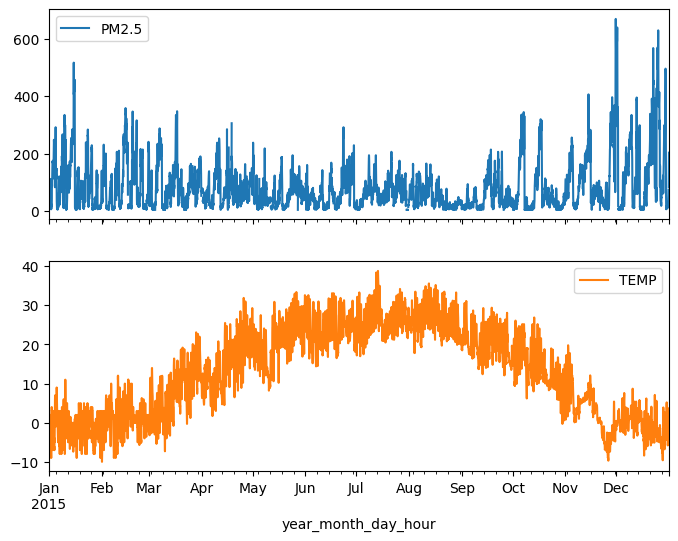

In [ ]:
"""
Filter the dataframe to include only the rows from the year 2015.
This will help in analyzing the PM2.5 and temperature values specifically for the year 2015.
"""
df_2015 = df.loc['2015']
pm_data_2015 = df_2015[['PM2.5', 'TEMP']]
pm_data_2015.plot(subplots=True)

array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

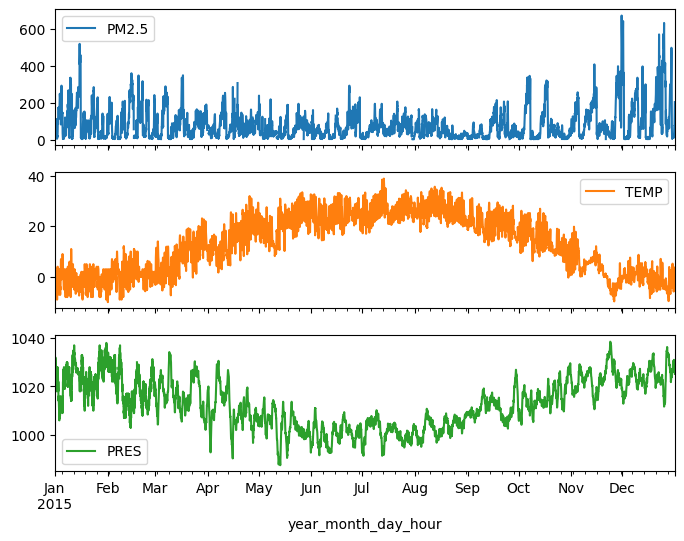

In [ ]:
"""
Filter the dataframe to include only the columns 'PM2.5', 'TEMP', and 'PRES' for the year 2015.
This will help in analyzing these specific variables for the year 2015.
"""
pm_data_2015 = df_2015[['PM2.5', 'TEMP', 'PRES']]
pm_data_2015.plot(subplots=True)

array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

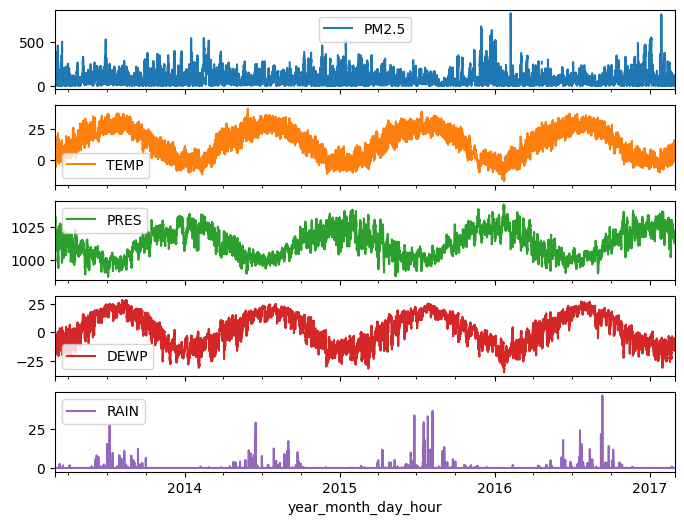

In [ ]:
"""
Filter the dataframe to include only the columns 'PM2.5', 'TEMP', 'PRES', 'DEWP', and 'RAIN'.
This will help in analyzing these specific variables.
"""
MD1 = df[['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN']]
MD1.plot(subplots=True)

array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

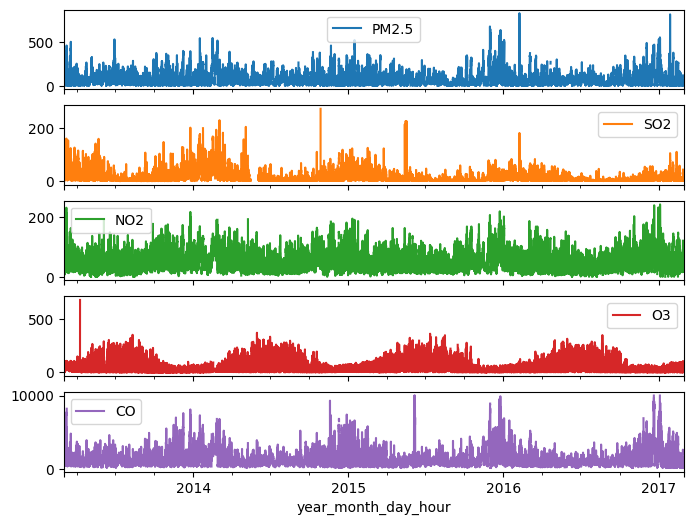

In [ ]:
MD2 = df[['PM2.5', 'SO2', 'NO2', 'O3', 'CO']]
# Plot the selected columns as subplots
"""
Filter the dataframe to include only the columns 'PM2.5', 'SO2', 'NO2', 'O3', and 'CO'.
This will help in analyzing these specific variables.
Plot the data for these columns as subplots to visualize their trends and patterns over time.
"""
MD2.plot(subplots=True)

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'TEMP'}>]], dtype=object)

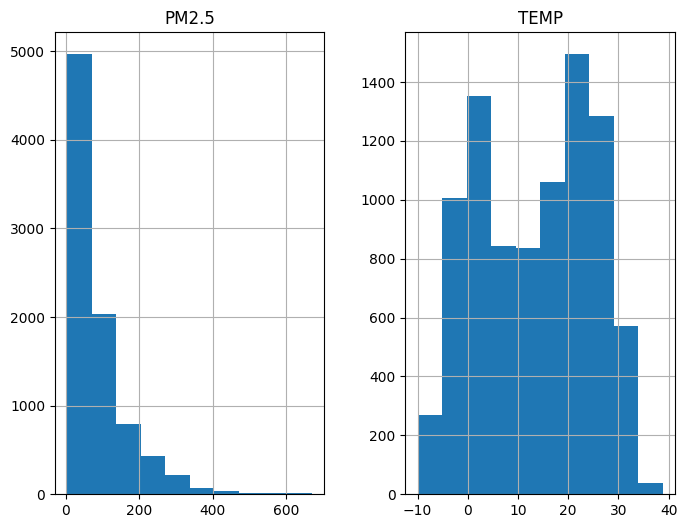

In [ ]:
"""
Plot histograms for the PM2.5 data for the year 2015.
This will help in understanding the distribution of PM2.5 values for the year 2015.
"""
pm_data_2015.hist()

Text(0.5, 0, 'year_month_day_hour')

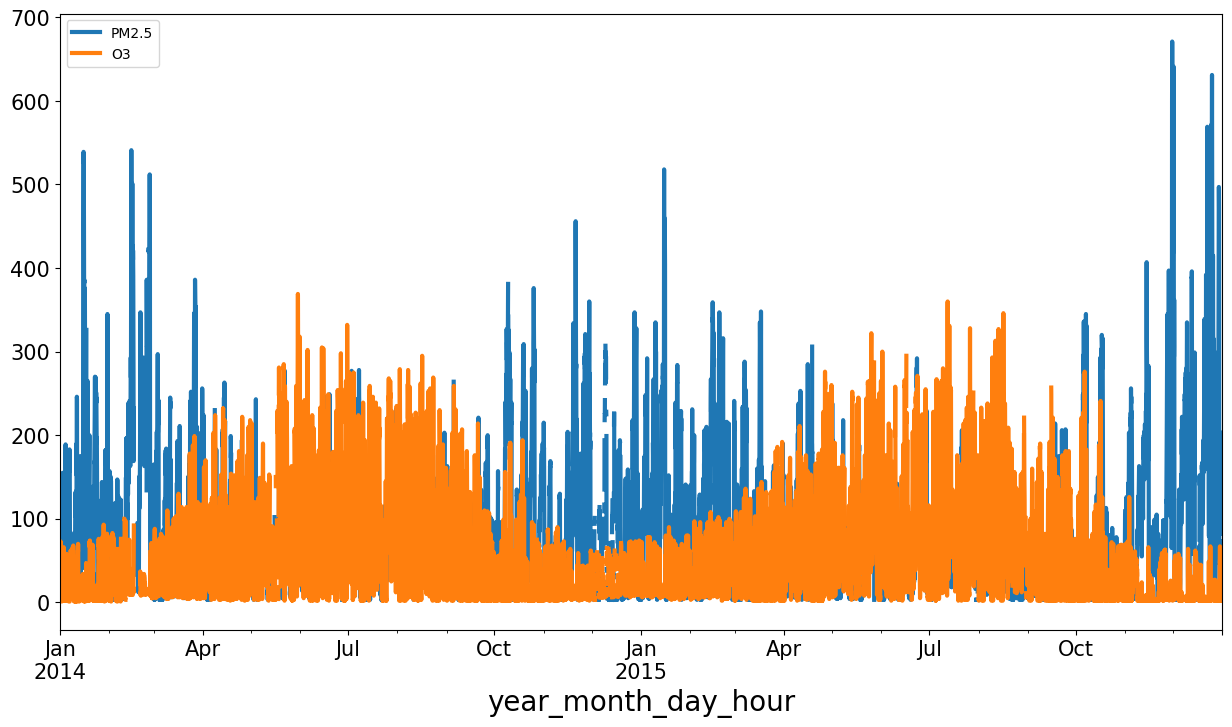

In [ ]:
"""
Filter the dataframe to include only the columns 'PM2.5' and 'O3' for the years 2014 and 2015.
Plot the data for these columns with a specified figure size, line width, and font size.
This will help in visualizing the trends and patterns in the PM2.5 and O3 values for the years 2014 and 2015.
"""
df['2014':'2015'][['PM2.5', 'O3']].plot(figsize=(15, 8), linewidth=3, fontsize=15)
plt.xlabel('year_month_day_hour', fontsize=20)
plt.xlabel('year_month_day_hour', fontsize=20)

<Axes: ylabel='Density'>

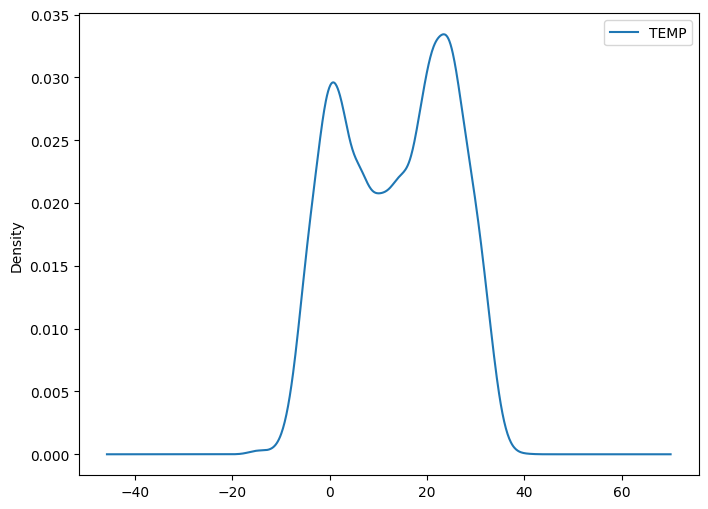

In [ ]:
"""
Plot the density distribution of the 'TEMP' column.
This will help in understanding the distribution of temperature values.
"""
df[['TEMP']].plot(kind='density')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

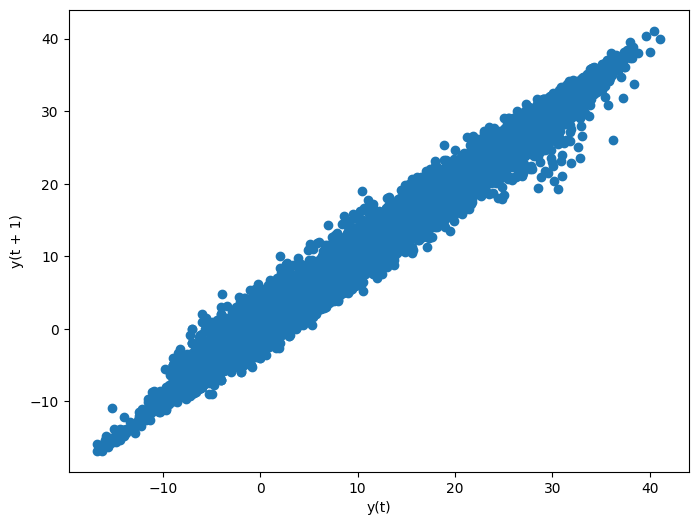

In [ ]:
"""
Plot a lag plot for the 'TEMP' column with a lag of 1.
This will help in visualizing the relationship between the temperature values at different time lags.
"""
pd.plotting.lag_plot(df['TEMP'], lag=1)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

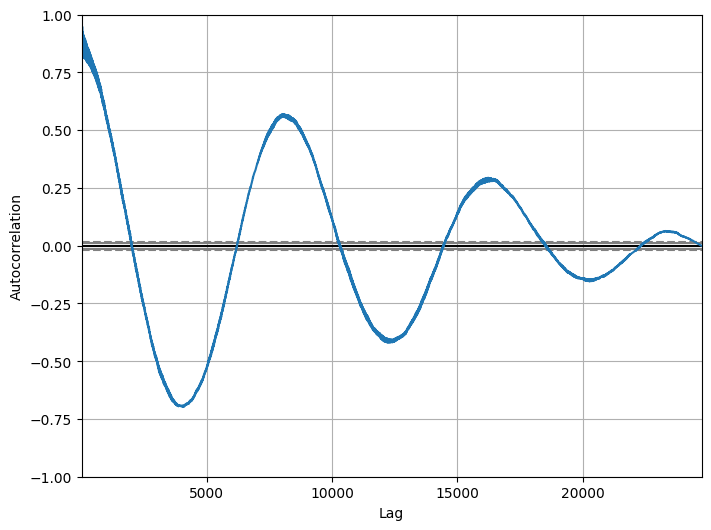

In [ ]:
"""
Drop rows with missing values from the dataframe.
This will help in ensuring that the data used for analysis does not contain any null values.
"""
df_na = df.dropna()
pd.plotting.autocorrelation_plot(df_na['2014':'2016']['TEMP'])

In [ ]:
"""
    Resample the 'TEMP' column to monthly frequency and calculate the mean temperature for each month.

    Parameters:
    df (DataFrame): The input dataframe containing the 'TEMP' column.

    Returns:
    Series: A pandas Series containing the mean temperature for each month.
    """
def resample_temp(df):
    return df['TEMP'].resample('1m').mean()

# Call the function and store the result
monthly_mean_temp = resample_temp(df_na)

C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_22416\539131838.py:1: FutureWarning:

'm' is deprecated and will be removed in a future version, please use 'ME' instead.



year_month_day_hour
2013-03-31     6.300929
2013-04-30    12.756535
2013-05-31    21.877778
2013-06-30    23.882386
2013-07-31    27.571263
2013-08-31    27.318308
2013-09-30    20.543228
2013-10-31    13.139049
2013-11-30     6.251989
2013-12-31     0.885546
2014-01-31    -0.234789
2014-02-28    -0.485102
2014-03-31    10.052828
2014-04-30    17.024282
2014-05-31    16.767881
2014-06-30    24.859077
2014-07-31    28.178854
2014-08-31    25.904208
2014-09-30    20.760851
2014-10-31    13.339607
2014-11-30     5.497753
2014-12-31    -1.128105
2015-01-31    -1.238179
2015-02-28     1.169219
2015-03-31     8.253776
2015-04-30    15.465468
2015-05-31    21.448153
2015-06-30    24.408321
2015-07-31    26.261111
2015-08-31    26.561376
2015-09-30    20.620177
2015-10-31    14.340382
2015-11-30     2.869044
2015-12-31    -0.394842
2016-01-31    -4.554939
2016-02-29     1.384470
2016-03-31     9.080028
2016-04-30    16.266327
2016-05-31    21.696448
2016-06-30    25.612446
2016-07-31    27.656

C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_22416\405625979.py:1: FutureWarning:

'm' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='Lag', ylabel='Autocorrelation'>

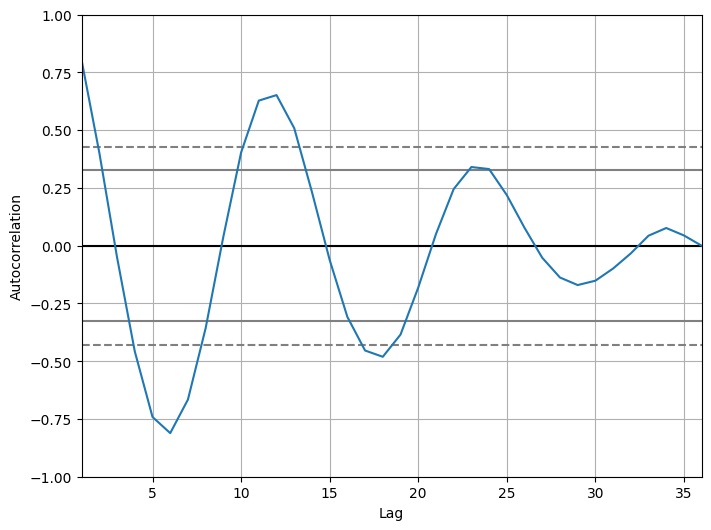

In [ ]:
"""
Resample the 'TEMP' column to monthly frequency and calculate the mean temperature for each month.

Returns:
Series: A pandas Series containing the mean temperature for each month.
"""
df_na1 = df_na['TEMP'].resample('1m').mean()
pd.plotting.autocorrelation_plot(df_na1['2014':'2016'])

C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_22416\1258880187.py:1: FutureWarning:

'm' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='Lag', ylabel='Autocorrelation'>

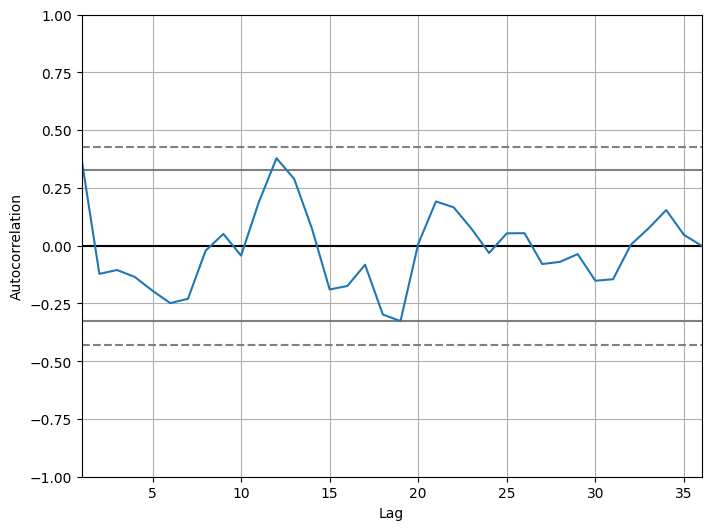

In [ ]:
"""
Resample the 'PM2.5' column to monthly frequency and calculate the mean PM2.5 values for each month.

Returns:
Series: A pandas Series containing the mean PM2.5 values for each month.
"""
df_na2 = df_na['PM2.5'].resample('1m').mean()
pd.plotting.autocorrelation_plot(df_na2['2014':'2016'])